               Feature Importance
Pregnancies              0.085251
Glucose                  0.263189
BloodPressure            0.089361
SkinThickness            0.068101
Insulin                  0.070668


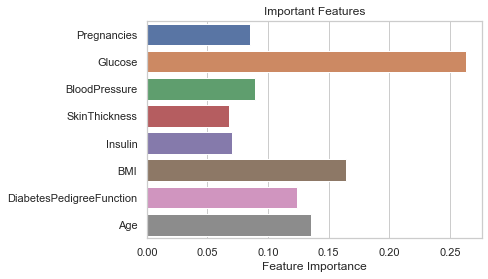

In [34]:
#Feature Importance of Random Forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier as RFC

#Load the dataset
data=pd.read_csv('diabetes.csv')

#Preprocessing
val=df.values
scaler=MinMaxScaler()
normalised_values=scaler.fit_transform(val)
data=pd.DataFrame(normalised_values,columns=df.columns)

#Splitting the dataset
X=data.drop(["Outcome"],axis=1)
y=data['Outcome']

#Applying a RFC model onto a diabetes dataframe and bringing the impotant features
def apply_RFC(X,y,columns):
    model = RFC(n_estimators=500,random_state=5)
    imp_features = model.fit(X,y).feature_importances_ 
    imp_features = pd.DataFrame(imp_features,columns=['Feature Importance'],index=columns)
    print(imp_features.head())
    return imp_features

important_features = apply_RFC(X,y, data.columns.drop('Outcome'))
sns.barplot(important_features['Feature Importance'], important_features.index)
plt.title("Important Features")
plt.show()

For feature 0 the importance is 0.06744791666666665
For feature 1 the importance is 0.1013020833333333
For feature 2 the importance is 0.031770833333333304
For feature 3 the importance is 0.04843749999999995
For feature 4 the importance is 0.02239583333333328
For feature 5 the importance is 0.02630208333333328
For feature 6 the importance is 0.04401041666666665
For feature 7 the importance is 0.07369791666666665


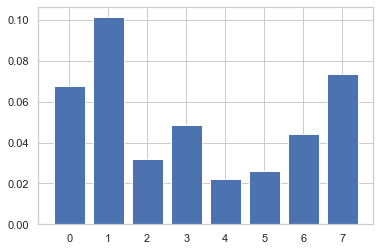

In [23]:
#Permutation feature importance using knn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

X=data.drop(['Outcome'],axis=1)
y=data['Outcome']

model=KNeighborsClassifier(n_neighbors=2)
model.fit(X,y)

results = permutation_importance(model, X, y, scoring='accuracy')
importance = results.importances_mean

for i, v in enumerate(importance):
    print(f"For feature {i} the importance is {v}")
    
plt.bar([x for x in range(len(importance))],importance)
plt.show()

1/1 [==============================] - 0s 14ms/step
1 change makes 0.508441686630249 prediction.
2 change makes 0.49789154529571533 prediction.
3 change makes 0.4859054386615753 prediction.
4 change makes 0.478007435798645 prediction.
5 change makes 0.4737704396247864 prediction.
6 change makes 0.4695371687412262 prediction.
7 change makes 0.4653083384037018 prediction.
8 change makes 0.4610844552516937 prediction.
9 change makes 0.45686614513397217 prediction.
10 change makes 0.45265403389930725 prediction.
11 change makes 0.4481624960899353 prediction.


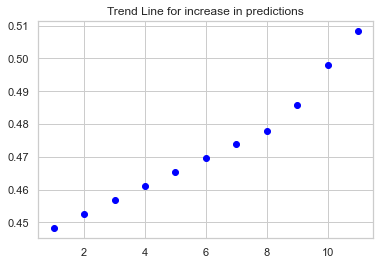

In [67]:
#Sensitivity analysis for own dataset
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple neural network model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(2,)))  # Input layer with 2 features
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Keep it like this itself
X = np.random.rand(100, 2)  # 100 samples with 2 features
y = np.random.randint(0, 2, 100)  # 100 random binary labels

# Train the model
model.fit(X, y, epochs=10, verbose=0)

# Perform sensitivity analysis for the first feature
def sensitivity_analysis(feature_index):
    original_value = X[0, feature_index]  # Store the original value
    predictions = []
    
    for change in np.linspace(-0.5, 0.5, 11):  # Vary the feature by -0.5 to 0.5 11 times
        X[0,feature_index] = original_value + change  # Apply the change
        prediction = model.predict(X[[0]])[0,0]  # Get the prediction
        predictions.append(prediction)
    return predictions

# Analyze sensitivity for the first feature
predictions = sensitivity_analysis(0)

for i, predic in enumerate(predictions):
    print(f"{i+1} change makes {predic} prediction.")
    
plt.scatter([1,2,3,4,5,6,7,8,9,10,11],sorted(predictions),c='blue')
plt.title("Trend Line for increase in predictions")
plt.show()